<a href="https://colab.research.google.com/github/nitesh7002/Assingment1/blob/master/DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pract 7,8,9,10,11 are all connected using same dataset.

# **Libraries and their function in Data Science.**

# **Various ways to import datasets in Google Colab.**

Mount Drive:
1. Open google colab
2. type:

	from google.colab import drive

  drive.mount('/content/drive')

This will mount the your google drive in google colab.


To import your CSV file from drive to colab:
1. Make sure you have already downloaded the CSV data file from a trusted website(Kaggle) and you have uploaded that file in a file named Colab Notebook in your google drive.
2. In colab type:

  import pandas as pd

  df=pd.read_csv('/content/drive/Mydrive/Colab Notebooks/your_file_name.csv')
	df.head()

this will display your CSV file in colab output.

# **Data Processing.**

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Check for missing values (no missing values in this case)
print("Missing values:\n", iris.isnull().sum())

# Convert 'species' column to categorical
iris['species'] = iris['species'].astype('category')

# Convert 'sepal_length' to float (just for example)
iris['sepal_length'] = iris['sepal_length'].astype(float)

# Normalization
scaler = MinMaxScaler()
iris['sepal_length_normalized'] = scaler.fit_transform(iris[['sepal_length']])

# Standardization
scaler = StandardScaler()
iris['sepal_width_standardized'] = scaler.fit_transform(iris[['sepal_width']])

# Drop original 'sepal_length' and 'sepal_width' columns
iris.drop(['sepal_length', 'sepal_width'], axis=1, inplace=True)

# Check the final dataset
print("Processed Iris dataset:\n", iris.head())



Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Processed Iris dataset:
    petal_length  petal_width species  sepal_length_normalized  \
0           1.4          0.2  setosa                 0.222222   
1           1.4          0.2  setosa                 0.166667   
2           1.3          0.2  setosa                 0.111111   
3           1.5          0.2  setosa                 0.083333   
4           1.4          0.2  setosa                 0.194444   

   sepal_width_standardized  
0                  1.019004  
1                 -0.131979  
2                  0.328414  
3                  0.098217  
4                  1.249201  


# **Data cleaning and outlier analysis.**

https://www.kaggle.com/datasets/ayushparwal2026/cars-dataset

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
#dropping columns with null values
df.drop('New_Price',axis=1,inplace=True)

In [ ]:
#filling null columns with median value
df['Seats'].fillna(df['Seats'].median(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7253 non-null   float64
 12  Price              7253 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


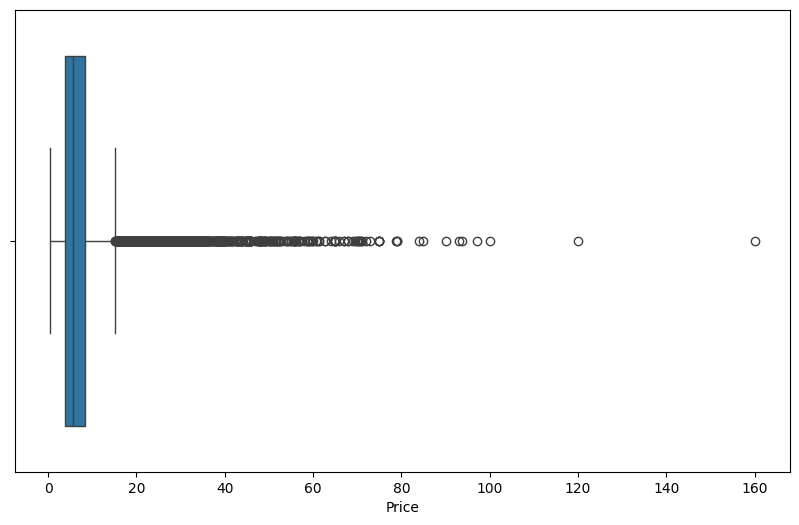

In [ ]:
#detecting outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Price'])
plt.show()


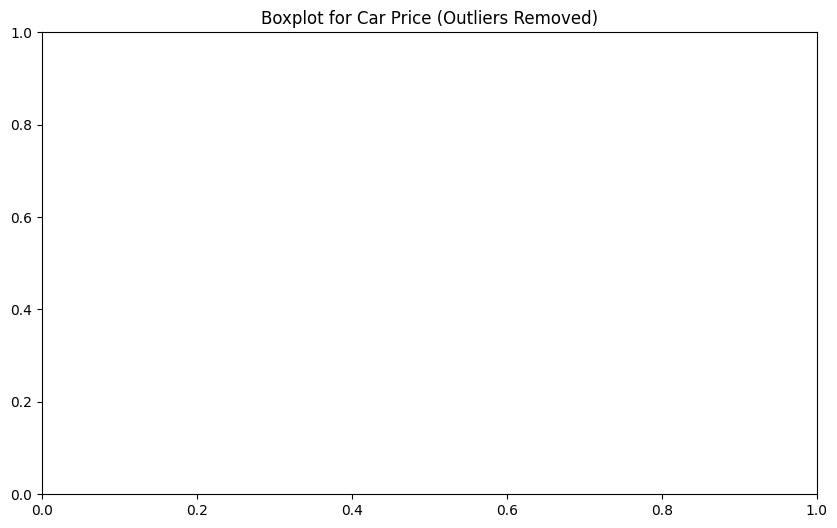

In [ ]:
#handling outliers
Q1=df['Price'].quantile(0.75)
Q3=df['Price'].quantile(0.25)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df_filtered=df[(df['Price']>= lower_bound)& (df['Price'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Price'])
plt.title('Boxplot for Car Price (Outliers Removed)')
plt.show()


# **Exploratory data analysis (EDA) and feature scaling.**

https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis

In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

scatterplot

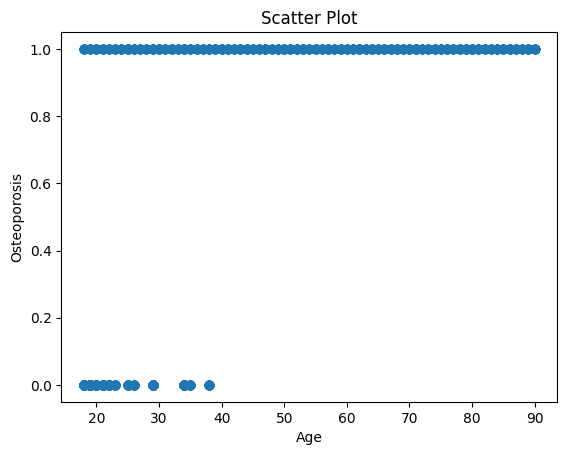

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot with day against tip
plt.scatter(df['Age'], df['Osteoporosis'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Age')
plt.ylabel('Osteoporosis')

plt.show()


line chart

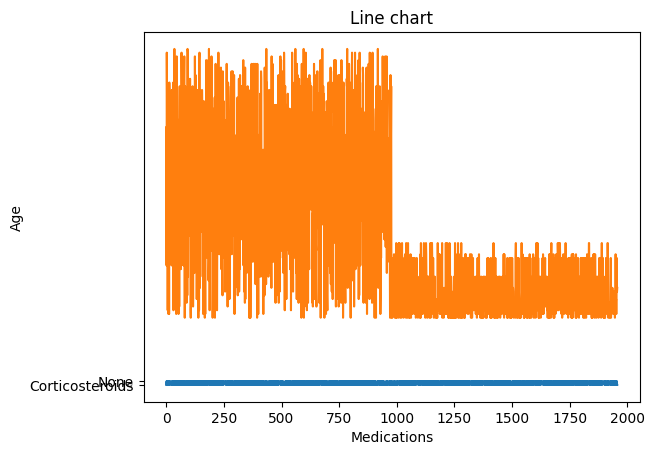

In [ ]:

plt.plot(df['Medications'])
plt.plot(df['Age'])

# Adding Title to the Plot
plt.title("Line chart")

# Setting the X and Y labels
plt.xlabel('Medications')
plt.ylabel('Age')

plt.show()


bar chart

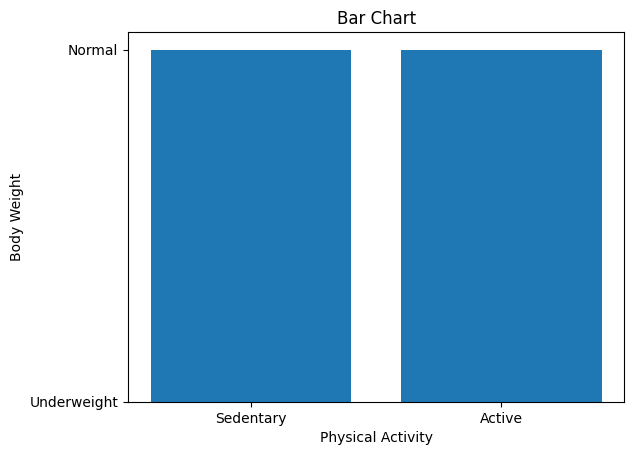

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt





plt.bar(df['Physical Activity'], df['Body Weight'])

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('Physical Activity')
plt.ylabel('Body Weight')

# Adding the legends
plt.show()


histogram

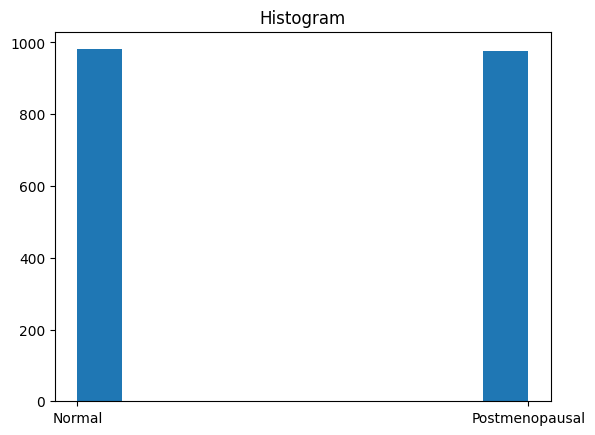

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.hist(df['Hormonal Changes'])

plt.title("Histogram")

# Adding the legends
plt.show()


scatterplot using sns

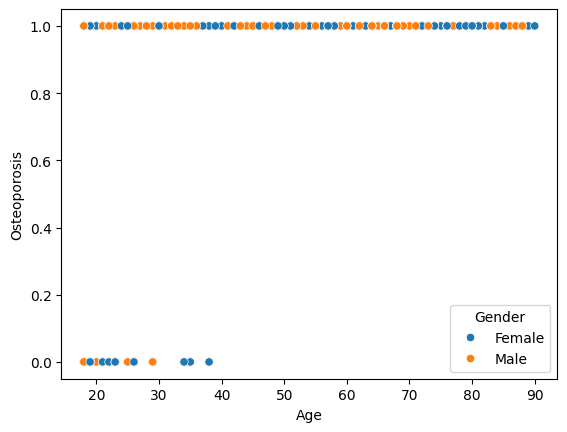

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains columns named 'Age', 'Osteoporosis', and 'sex'
sns.scatterplot(data=df, x='Age', y='Osteoporosis', hue='Gender')

plt.show()

lineplot using sns

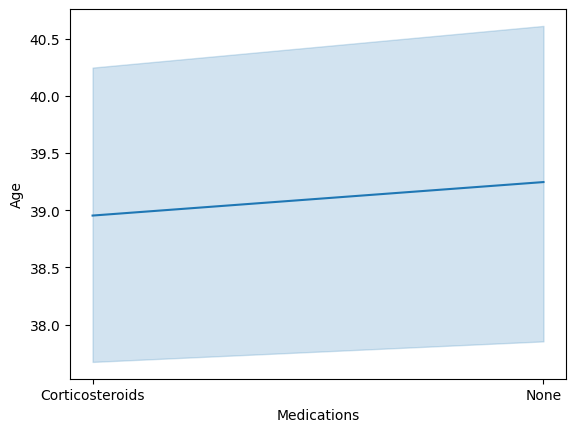

In [ ]:
sns.lineplot(x='Medications', y='Age', data=df)
plt.show()

bar plot using sns

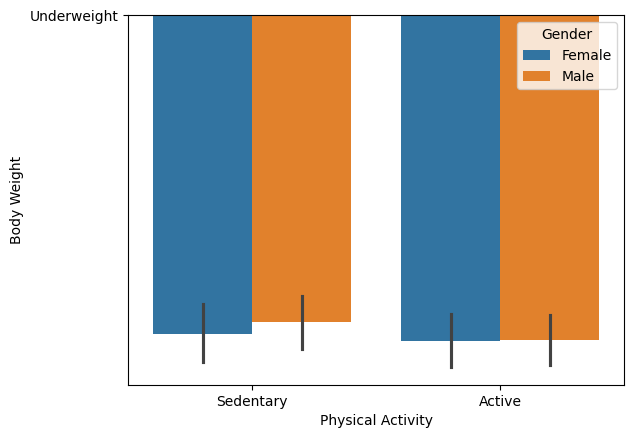

In [ ]:
sns.barplot(x='Physical Activity',y='Body Weight', data=df,
            hue='Gender')

plt.show()

histogram using sns

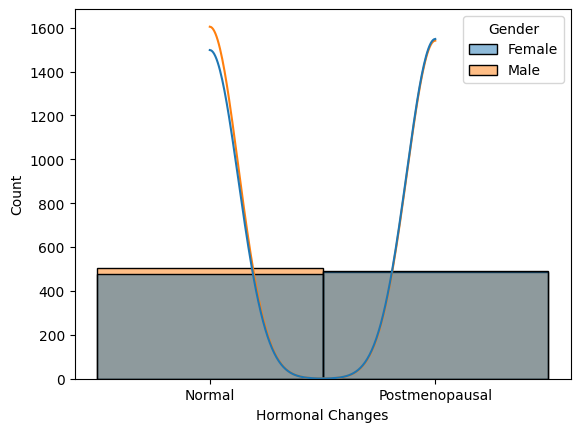

In [ ]:
sns.histplot(x='Hormonal Changes', data=df, kde=True, hue='Gender')

plt.show()

heatmap


<ipython-input-39-4cb3734ae773>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

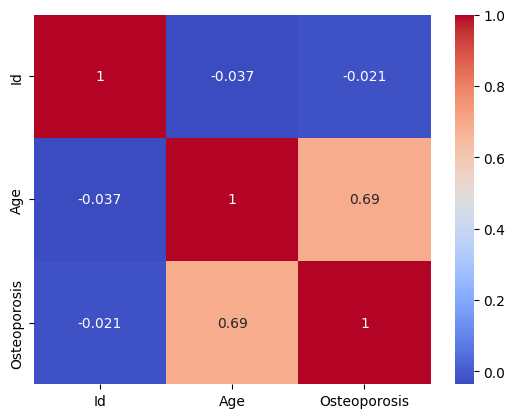

In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


***\feature scaling using standardisation and min max scaler***

In [ ]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']
Numerical columns : ['Id', 'Age', 'Osteoporosis']


In [ ]:
df.size

31328

In [ ]:
df.isnull()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1954,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1955,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1956,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [ ]:
df.head(11)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1
5,102265,41,Male,Normal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
6,107447,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,None,Rheumatoid Arthritis,None,No,1
7,103065,39,Male,Postmenopausal,Yes,Asian,Normal,Adequate,Sufficient,Sedentary,No,None,Rheumatoid Arthritis,Corticosteroids,Yes,1
8,103040,70,Male,Postmenopausal,No,Asian,Underweight,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
9,105960,19,Female,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,None,Corticosteroids,Yes,1


In [ ]:
x=df.iloc[:,1:2].values
print("original data values", x)

original data values [[69]
 [32]
 [89]
 ...
 [34]
 [25]
 [26]]


In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
x_after_min_max_scaler=min_max_scaler.fit_transform(x)
print("after min max scaler: ", x_after_min_max_scaler)

after min max scaler:  [[0.70833333]
 [0.19444444]
 [0.98611111]
 ...
 [0.22222222]
 [0.09722222]
 [0.11111111]]


In [ ]:
Standardisation=preprocessing.StandardScaler()

In [ ]:
x_after_Standardisation=Standardisation.fit_transform(x)
print("after standardisation", x_after_Standardisation)

after standardisation [[ 1.4004177 ]
 [-0.33260578]
 [ 2.33718715]
 ...
 [-0.23892884]
 [-0.66047509]
 [-0.61363662]]


feature scaling with one hot encoding

In [ ]:
continuous_features = ['Age']
categorical_features = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features)


In [ ]:
# Displaying the scaled continuous features
print("Scaled Continuous Features:")
print(df[continuous_features].head())

# Displaying the first few rows of the DataFrame after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())


Scaled Continuous Features:
        Age
0  0.708333
1  0.194444
2  0.986111
3  0.833333
4  0.277778

DataFrame after One-Hot Encoding:
       Id       Age  Osteoporosis  Scaled_Age  Gender_Female  Gender_Male  \
0  104866  0.708333             1    0.708333              1            0   
1  101999  0.194444             1    0.194444              1            0   
2  106567  0.986111             1    0.986111              1            0   
3  102316  0.833333             1    0.833333              1            0   
4  101944  0.277778             1    0.277778              0            1   

   Hormonal Changes_Normal  Hormonal Changes_Postmenopausal  \
0                        1                                0   
1                        1                                0   
2                        0                                1   
3                        1                                0   
4                        0                                1   

   Family History_No  F

# Implementation Linear Regression model

1.   List item

1.   List item

1.   List item

1.   List item
2.   List item


2.   List item


2.   List item


2.   List item



https://www.kaggle.com/datasets/ayushparwal2026/cars-dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the processed dataset
processed_file_path = '/content/drive/MyDrive/Colab Notebooks/processed_used_cars_data.csv'
df = pd.read_csv(processed_file_path)

# Select features and target variable
X = df[['Year', 'Kilometers_Driven', 'Seats']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the processed dataset
processed_file_path = '/content/drive/MyDrive/Colab Notebooks/processed_used_cars_data.csv'
df = pd.read_csv(processed_file_path)

# Handle missing values in 'Year', 'Kilometers_Driven', and 'Seats'
# Here, we'll impute missing values in 'Seats' with the median
df['Seats'].fillna(df['Seats'].median(), inplace=True)

# Drop any remaining rows with missing values
df.dropna(subset=['Year', 'Kilometers_Driven'], inplace=True)

# Select features and target variable
X = df[['Year', 'Kilometers_Driven', 'Seats']]
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the Linear Regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the testing data
y_pred = model_lr.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 129.48726694234296
R-squared Score: -0.05223306995845012


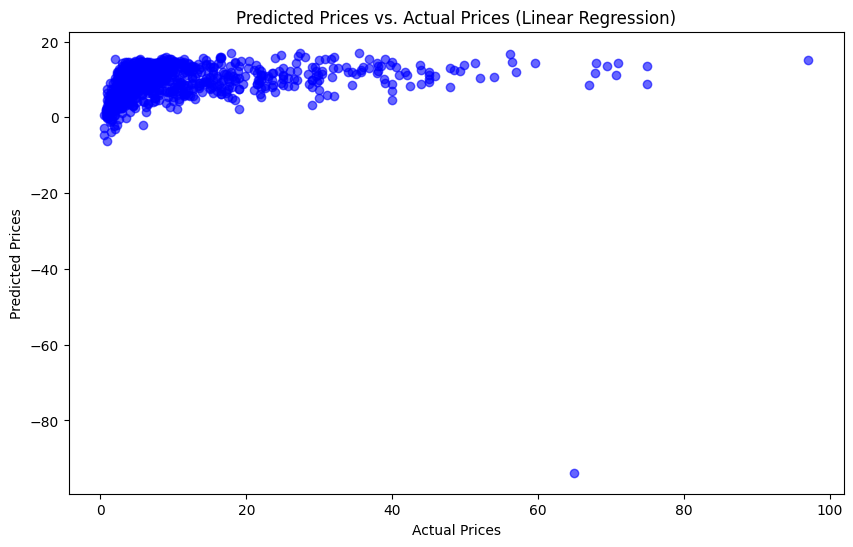

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title("Predicted Prices vs. Actual Prices (Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 129.48726694234296
R-squared Score: -0.05223306995845012


# **Implementation Support Vector Machine model**

Dataset used : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Linear regression

In [ ]:
# For the purpose of this example, let's predict `serum_creatinine` based on other features
X = df.drop(['serum_creatinine'], axis=1)
y = df['serum_creatinine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.4512792117345203


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error (MSE): 1.4512792117345203
R-squared Score: -0.04586526052336026


splitting of data

In [ ]:
x = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (239, 12)
The Shape of x_test : (60, 12)
The Shape of y_train : (239, 1)
The Shape of y_test : (60, 1)


support vector machine


In [ ]:
svm = SVC(C = 0.6, random_state = 42, kernel='rbf')
svm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.6, random_state=42)

In [ ]:
y_pred = svm.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print(ac)

[[40  1]
 [14  5]]
0.75


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84        41
         1.0       0.83      0.26      0.40        19

    accuracy                           0.75        60
   macro avg       0.79      0.62      0.62        60
weighted avg       0.77      0.75      0.70        60



In [ ]:
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on test set: 0.75

Confusion Matrix:
 [[40  1]
 [14  5]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.98      0.84        41
         1.0       0.83      0.26      0.40        19

    accuracy                           0.75        60
   macro avg       0.79      0.62      0.62        60
weighted avg       0.77      0.75      0.70        60



# **Implementation of Decision Tree model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file with a relative path
df = pd.read_csv('C:\Users\yadav\Downloads\archive\train.csv')
df.head()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-1-5fa92469a2f2>, line 4)

In [ ]:
x = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)


print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

In [ ]:
y_predd = classifier.predict(x_test)
y_predd

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predd)
ac = accuracy_score(y_test, y_predd)

print(cm)
print(ac)

In [ ]:
print(classification_report(y_test,y_predd))

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predd))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predd))
print("\nClassification Report:\n", classification_report(y_test, y_predd))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Use the best parameters to make predictions
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(x_test)

# Re-evaluate the model
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nOptimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


# **Naive Bayesion classifier**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Assuming Gaussian distribution of features
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_predd = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predd))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predd))
print("\nClassification Report:\n", classification_report(y_test, y_predd))


Accuracy: 0.75

Confusion Matrix:
 [[38  3]
 [12  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        41
           1       0.70      0.37      0.48        19

    accuracy                           0.75        60
   macro avg       0.73      0.65      0.66        60
weighted avg       0.74      0.75      0.72        60



# **Logistic regression**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



In [ ]:
mylist = []

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  1]
 [10  9]]
0.8166666666666667


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60



# **Clustering, KMN classifier, K means**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.drop('DEATH_EVENT', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'df' is not defined

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
k = 3  # example value
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of patients')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


# **Reinforcement learning**
Taxi(v3)

Taxi(v3) game:
- The Taxi-v3 environment is a classic grid-world problem.
- The goal is for a taxi agent to pick up passengers and drop them off at specified locations.
- The agent navigates a 5x5 grid world with passengers, destinations, and walls.
- The task involves learning an optimal policy to maximize rewards while obeying traffic rules.


In [ ]:
!pip install gym


In [ ]:
import gym
import numpy as np

# Create the Taxi-v3 environment
env = gym.make('Taxi-v3')


In [ ]:
# Initialize Q-table with zeros
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000
max_steps_per_episode = 100


In [ ]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q_table[state])  # Exploit

        new_state, reward, done, _ = env.step(action)

        # Update Q-table
        Q_table[state, action] = Q_table[state, action] + alpha * \
            (reward + gamma * np.max(Q_table[new_state]) - Q_table[state, action])

        total_reward += reward
        state = new_state

        if done:
            break

    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")


Episode 0, Total Reward: -244
Episode 100, Total Reward: -118
Episode 200, Total Reward: -136
Episode 300, Total Reward: -109
Episode 400, Total Reward: -145
Episode 500, Total Reward: -64
Episode 600, Total Reward: -73
Episode 700, Total Reward: -145
Episode 800, Total Reward: -93
Episode 900, Total Reward: -136


In [ ]:
num_test_episodes = 10

for episode in range(num_test_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = np.argmax(Q_table[state])
        new_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = new_state

        if done:
            break

    print(f"Test Episode {episode + 1}, Total Reward: {total_reward}")


Test Episode 1, Total Reward: -100
Test Episode 2, Total Reward: -100
Test Episode 3, Total Reward: -100
Test Episode 4, Total Reward: -100
Test Episode 5, Total Reward: -100
Test Episode 6, Total Reward: -100
Test Episode 7, Total Reward: -100
Test Episode 8, Total Reward: -100
Test Episode 9, Total Reward: -100
Test Episode 10, Total Reward: -100


In [ ]:
env.close()
